### Classification Problem for Bank Term deposits

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import style
style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
df.drop('ID',1, inplace = True)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_15004\502181983.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('ID',1, inplace = True)


<AxesSubplot:>

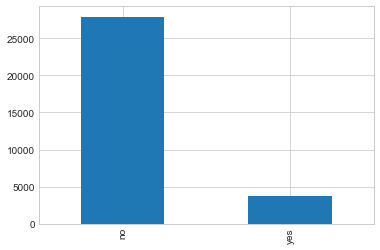

In [7]:
df['subscribed'].value_counts().plot.bar()

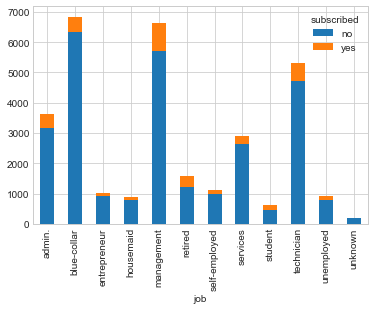

In [8]:
df1 = pd.crosstab(index = df['job'], columns = df['subscribed']).plot.bar(stacked = True)

In [10]:
enco = LabelEncoder()
list1 = ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month','poutcome', 'subscribed']

for x in list1:
    df[x] = enco.fit_transform(df[x])

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


<AxesSubplot:>

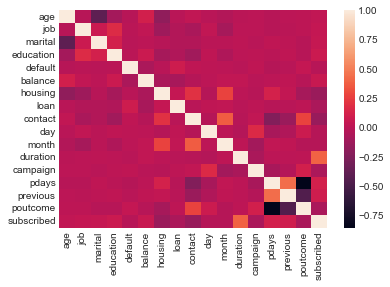

In [14]:
sns.heatmap(df.corr())

In [15]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


#### Model Building

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [17]:
X = df.drop('subscribed', 1)
y = df['subscribed']

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_15004\1412152643.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('subscribed', 1)


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 0)

## Logistic Regression

In [19]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

c:\Users\X1 Yoga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
prediction = logi.predict(X_val)

In [21]:
logi.score(X_val, y_val)

0.8829383886255924

In [22]:
accuracy_score(y_val, prediction)

0.8829383886255924

## Decision Tree Classifier

In [23]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=0)

In [24]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [25]:
prediction1 = dtc.predict(X_val)

In [26]:
dtc.score(X_val, y_val)

0.8924170616113745

In [27]:
accuracy_score(y_val, prediction1)

0.8924170616113745

In [28]:
test = pd.read_csv('test.csv')

enco = LabelEncoder()
list1 = ['job', 'marital', 'education', 'default','housing',
       'loan', 'contact','month','poutcome']

for x in list1:
    test[x] = enco.fit_transform(test[x])



In [29]:
test1 = test.drop('ID', 1)
test_prediction = dtc.predict(test1)

C:\Users\X1 Yoga\AppData\Local\Temp\ipykernel_15004\2589715582.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test1 = test.drop('ID', 1)


In [30]:
submission = pd.DataFrame()

submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

submission.to_csv('submission.csv', header=True, index=False)

In [36]:
df = pd.read_csv('train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [35]:
df['education'].value_counts()

1    16224
2     9301
0     4808
3     1314
Name: education, dtype: int64

In [34]:
df.groupby('job').mean()['balance']

job
0     1111.109336
1     1069.550132
2     1544.754960
3     1469.773455
4     1755.432143
5     2018.068615
6     1700.780944
7     1022.295212
8     1412.192126
9     1257.465235
10    1497.725967
11    1626.378641
Name: balance, dtype: float64

In [33]:
df.job.value_counts()

1     6842
4     6639
9     5307
0     3631
7     2903
5     1574
6     1123
2     1008
10     905
3      874
8      635
11     206
Name: job, dtype: int64

In [32]:
yes_def = df[df['default'] == 'yes']

In [37]:
yes_def.groupby('marital').mean()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
marital,,,,,,,,,,,,,,,,


In [38]:
df23 = yes_def[yes_def['marital']=='single']

In [39]:
df23[df23['job'] == 'unemployed']['campaign'].value_counts()

Series([], Name: campaign, dtype: int64)